In [4]:
import numpy as np
from pandas.core.frame import DataFrame
import forces
from scipy.integrate import odeint
from scipy.stats import maxwell 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<h2 style="color:orange">Function to create N randomized particles</h2>

In [1]:
def randomized(N):
    Results = pd.DataFrame(columns=['rand_x','rand_y','rand_z','rho_','theta_','phi_','dRho_','dTheta_','dPhi_','Rp_','gamma_','time_'])
    while Results.count()[0] != N:
        Rp = np.random.uniform(7.5*10**(-7) - 3.75*10**(-8), 7.5*10**(-7) + 3.75*10**(-8))
        rho = np.random.uniform(39.107,39.107+(2*np.pi))
        theta = np.random.uniform((np.pi-np.sqrt(1/40)),(np.pi+np.sqrt(1/40)))
        phi = np.random.uniform(0,np.pi*2)
        vx = maxwell.rvs() #change later
        vy = maxwell.rvs()
        vz = maxwell.rvs()



        eta = (0.00700175)/(vx*6*np.pi*(7.5*10**(-7)))#Eta is for Average Rp and Average velocity for all cartesian directions
        gamma = 6*np.pi*eta*Rp #gamma is for random Rp


        
        dRhodT = vx*np.sin(theta)*np.cos(phi)+vy*np.sin(theta)*np.sin(phi)+vz*np.cos(theta)
        if dRhodT <= 0.0075:
            Results = pd.concat([pd.DataFrame([[vx,vy,vz,rho,theta,phi,dRhodT,np.pi/2,1e-10,Rp,gamma,None]],columns = Results.columns),Results],ignore_index = True)
    return Results

In [43]:
print(randomized(4))

     rand_x    rand_y    rand_z       rho_    theta_      phi_     dRho_  \
0  1.431004  1.291075  1.283701  40.927951  3.009710  2.094396 -1.219611   
1  1.237102  3.035151  1.761006  43.844694  3.051735  0.762166 -1.485536   
2  2.333590  2.548469  1.182584  44.821858  3.234547  1.558147 -1.416750   
3  1.486598  0.949615  2.928494  39.284317  3.153624  4.835661 -2.919142   

    dTheta_         dPhi_           Rp_    gamma_ time_  
0  1.570796  1.000000e-10  7.560109e-07  0.004893  None  
1  1.570796  1.000000e-10  7.579646e-07  0.005660  None  
2  1.570796  1.000000e-10  7.232031e-07  0.003000  None  
3  1.570796  1.000000e-10  7.518798e-07  0.004710  None  


<h2 style="color:deeppink">ODE Solver Function</h2>

In [51]:
def f(u, t, par, gamma):
        rho, drho, theta, dtheta, phi, dphi = u
        dudt = [
                drho, forces.rho(rho, theta, par) - gamma * drho + rho * (dtheta * np.cos(phi)) ** 2 + rho * dphi ** 2,
                dtheta, (forces.theta(rho, theta, par) - gamma * rho * dtheta * np.cos(phi) - 2 * drho * dtheta * np.cos(phi) + 2 * rho * dtheta * dphi * np.sin(phi)) / (rho * np.cos(phi)),
                dphi, (forces.phi(rho, theta, par) - gamma * rho * dphi - 2 * drho * dphi - rho * dphi ** 2 * np.sin(phi) * np.cos(phi)) / rho
            ]
        if rho <= 39.107 and theta <= (np.pi/2 + 0.01) and theta >= (np.pi - 0.01):
            TC.append(t)
            return [None,None,None,None,None,None]
        return dudt

In [52]:

def solve(Results):
    global TC
    j = 0
    time = np.linspace(0,20,100)
    while j != len(F.index):
        gamma_ = Results['gamma_'][j]
        par = {
            'l': 40,
            'x_r': 39.107,            
            'R_ratio': (Results['Rp_'][j])/(5.6*10**(-5)), 
            'n_w': 1.326,
            'n_p': 1.572
            }
        u0 = [Results['rho_'][j],Results['dRho_'][j], Results['theta_'][j], Results['dTheta_'][j], Results['phi_'][j], Results['dPhi_'][j]] 
        sol = odeint(f, u0, time, args = (par, gamma_))
        if len(TC) != 0:
            Results.at[j,'time_'] = TC[0]
            TC = []
        j+=1
    return Results


In [54]:
F = randomized(1000)
h = solve(F).dropna()
h = h.sort_values('time_', ascending = True)
print(h)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Empty DataFrame
Columns: [rand_x, rand_y, rand_z, rho_, theta_, phi_, dRho_, dTheta_, dPhi_, Rp_, gamma_, time_]
Index: []


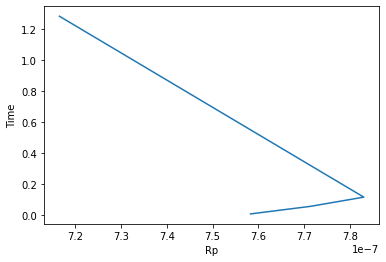

In [47]:
plt.plot(h['Rp_'],h['time_'])
plt.xlabel('Rp')
plt.ylabel('Time')
plt.show()

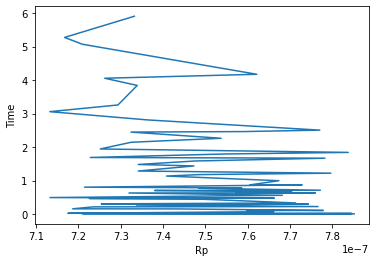

In [41]:
plt.plot(h['Rp_'],h['time_'])
plt.xlabel('Rp')
plt.ylabel('Time')
plt.show()

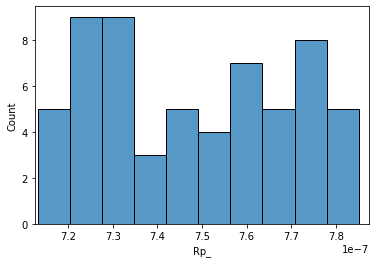

In [42]:
fig, ax = plt.subplots()
sns.histplot(h['Rp_'], bins = 10, ax = ax)
ax.set_xlim(7.5*10**(-7)-3.75*10**(-8), 7.5*10**(-7)+3.75*10**(-8))
plt.show()